# RBM 

In [65]:
# Set up and load modules nothing special here
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['savefig.dpi'] = 100

# Our modules
from uvnn.utils.readers import CsvReader
from uvnn.utils.images import show_images
from uvnn.rbms.rbm import RBM


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.38 ms


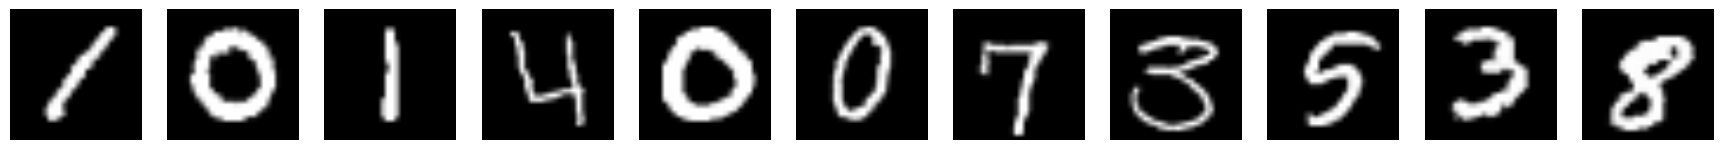

time: 6.19 s


In [153]:
#csv_reader = CsvReader(has_header=False, fn='../input/trunc_mnist/trunc_mnist20x20_inputs.csv')
csv_reader = CsvReader(fn='../input/kaggle_set/train.csv',has_header=True, label_pos=0) #mnist 28x28
X, y = csv_reader.load_data()
n_train = 10000
def preprocess(X):
    '''Normalization for mnist between 0..1 for RBM'''
    # normalize betwe 0 .. 1 
    xx = X / 255.
    #xx = (X > 0.5).astype('float64')
    return xx
X = preprocess(X)
X_train = X[:40000, :]
y_train = y[:40000]
X_test = X[40000:41000,:]
y_test = y[40000:41000]
show_images(X[:11, :], 28, 28, 12)


In [160]:
rbm = RBM(num_visible=784, num_hidden=200)
errors = rbm.train(X_train, max_epochs=600)



Epoch 0: error is 8805584.14054
Epoch 1: error is 3805625.2948
Epoch 2: error is 3116215.05817
Epoch 3: error is 3003635.45685
Epoch 4: error is 2707543.18824
Epoch 5: error is 2886958.14199
Epoch 6: error is 2650925.62354
Epoch 7: error is 2722606.45002
Epoch 8: error is 2512767.71125
Epoch 9: error is 2655122.75663
Epoch 10: error is 2440153.03477
Epoch 11: error is 2550415.36681
Epoch 12: error is 2353493.8142
Epoch 13: error is 2456109.54829
Epoch 14: error is 2279434.33445
Epoch 15: error is 2363016.89068
Epoch 16: error is 2215706.13568
Epoch 17: error is 2274376.93203
Epoch 18: error is 2160790.03117
Epoch 19: error is 2195028.44858
Epoch 20: error is 2114271.10376
Epoch 21: error is 2125802.86608
Epoch 22: error is 2073796.00539
Epoch 23: error is 2068062.32619
Epoch 24: error is 2034515.51435
Epoch 25: error is 2019508.98732
Epoch 26: error is 1995844.46264
Epoch 27: error is 1979435.34662
Epoch 28: error is 1959679.37632
Epoch 29: error is 1942805.13282
Epoch 30: error is 192

(784, 200)


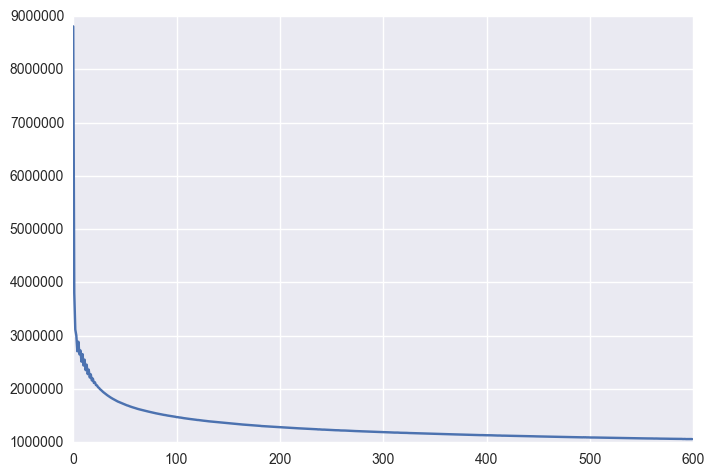

time: 406 ms


In [161]:
W = rbm.weights[1:, 1:]
print W.shape
plt.plot(range(len(errors)), errors)



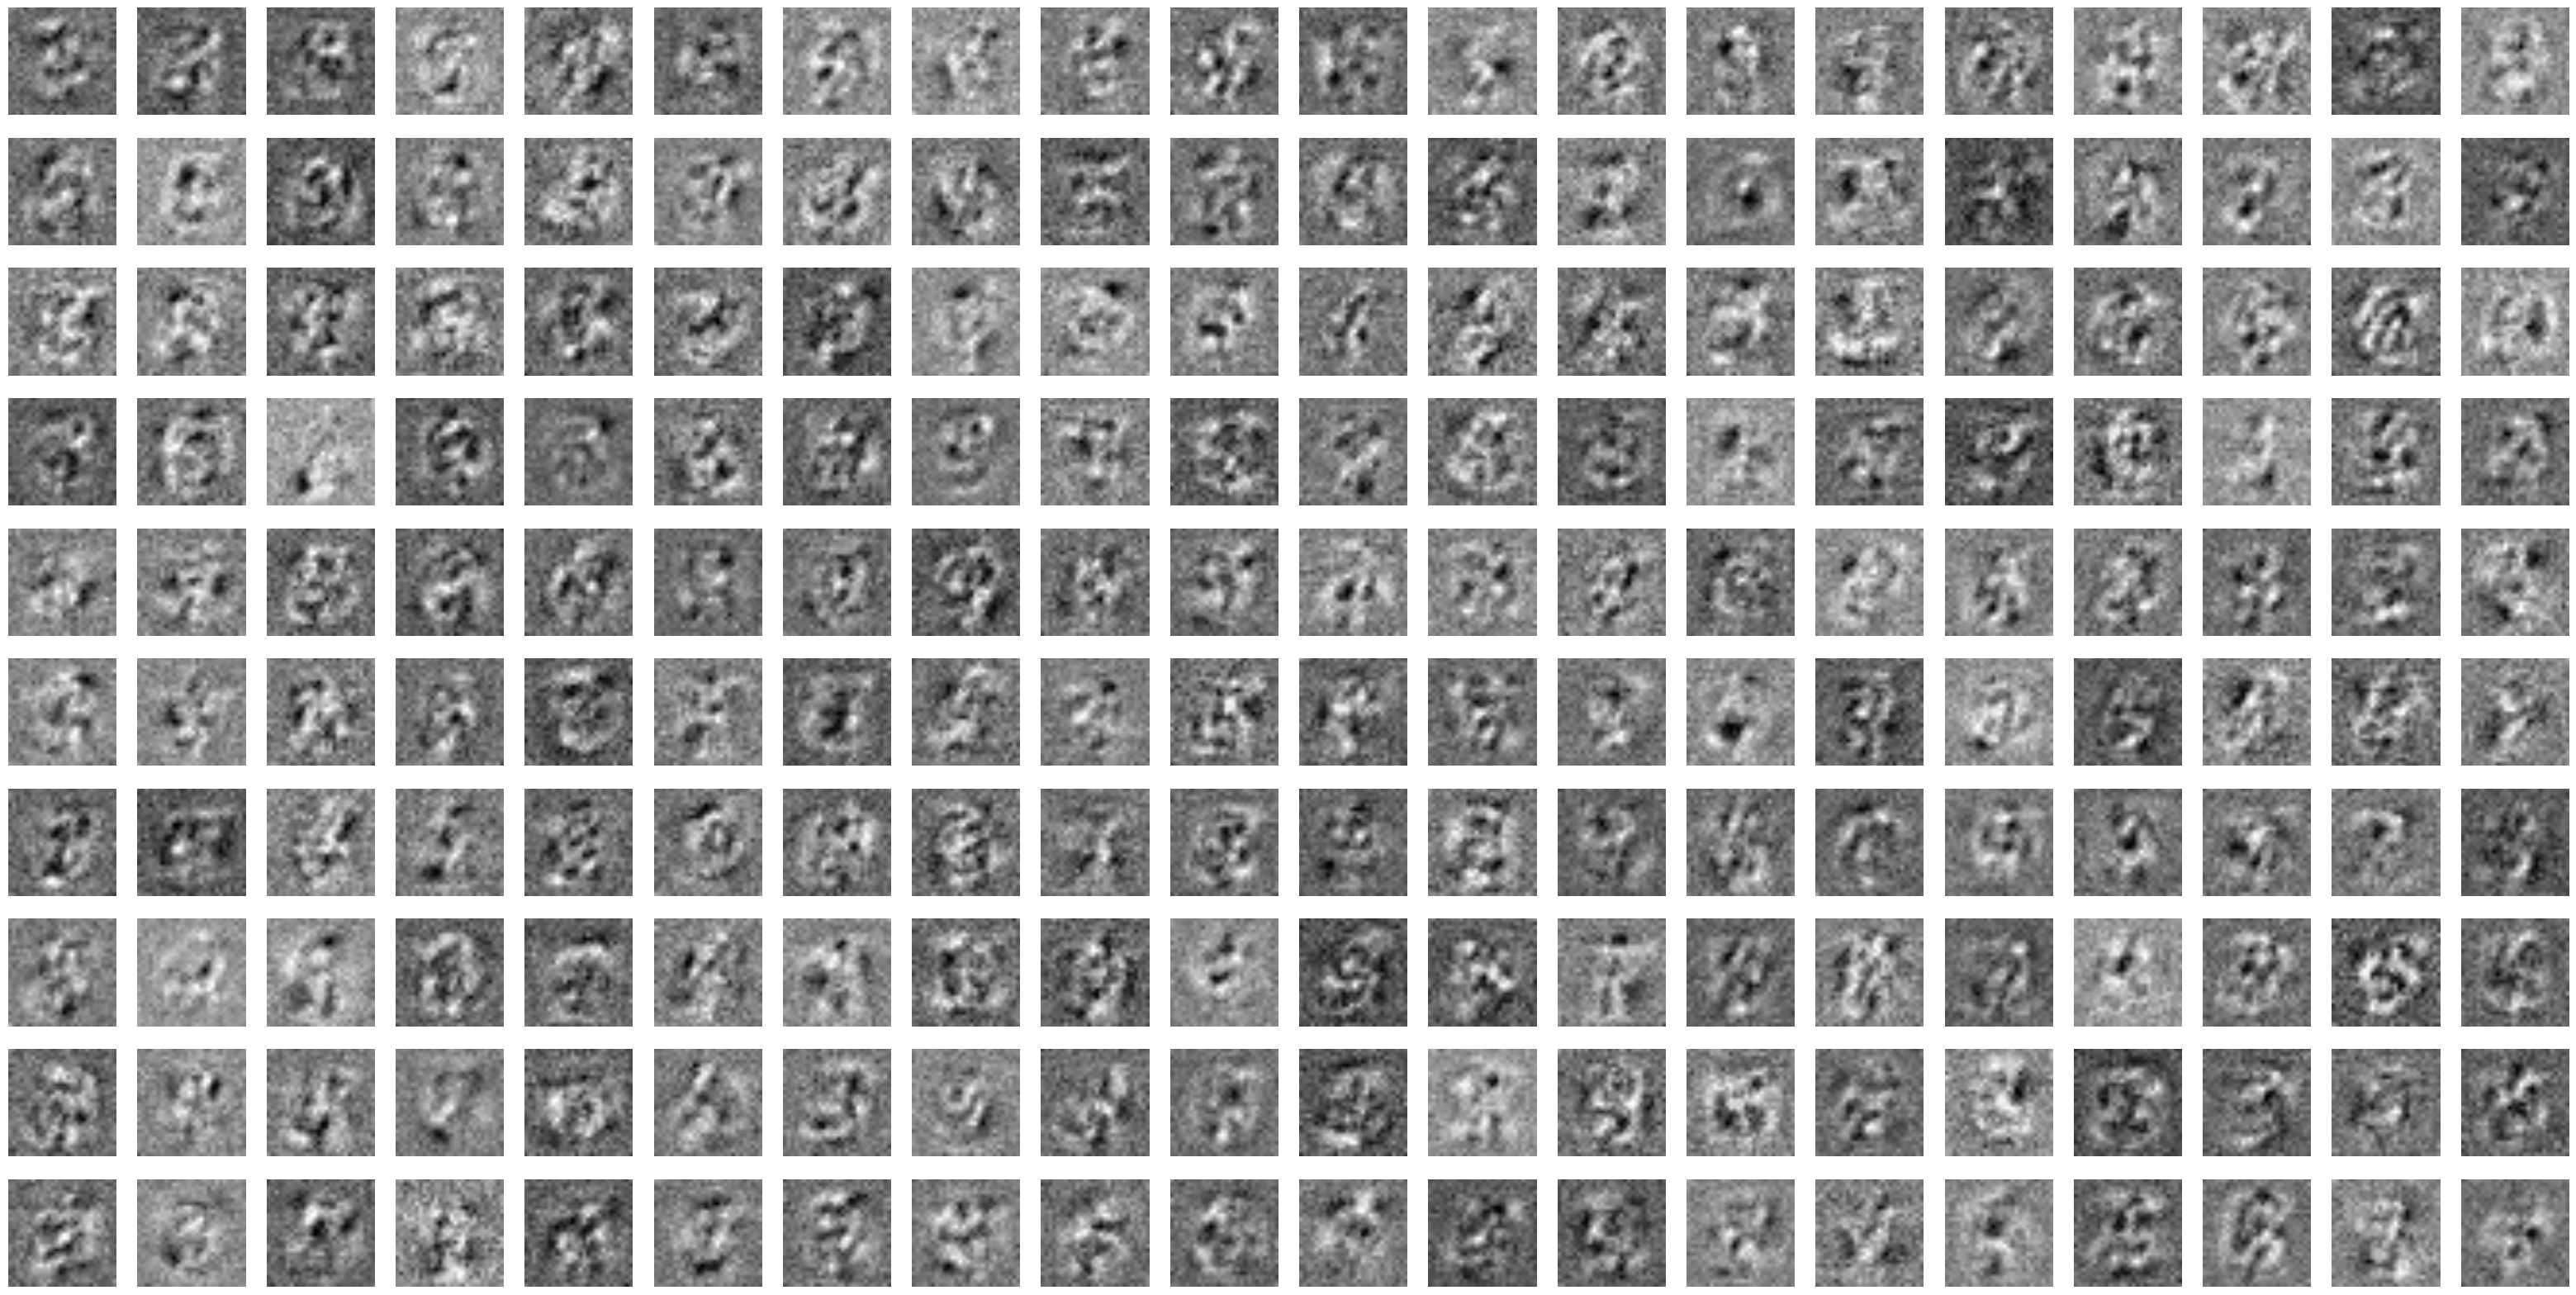

time: 15.5 s


In [162]:
show_images(W.T, 28, 28, 20) 



In [163]:
data = X[5000:5010, :]
hidden = rbm.run_visible(data)
visible = rbm.run_hidden(hidden)

time: 10.2 ms


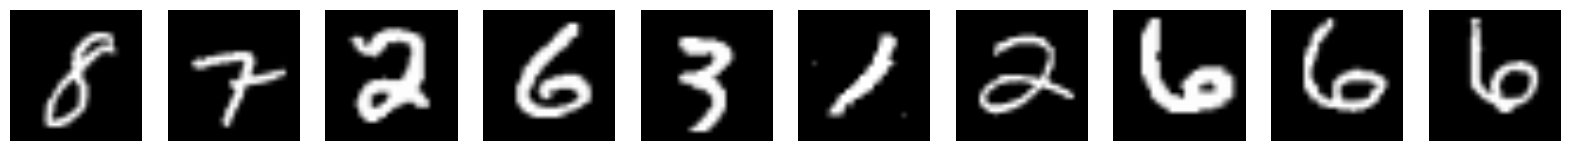

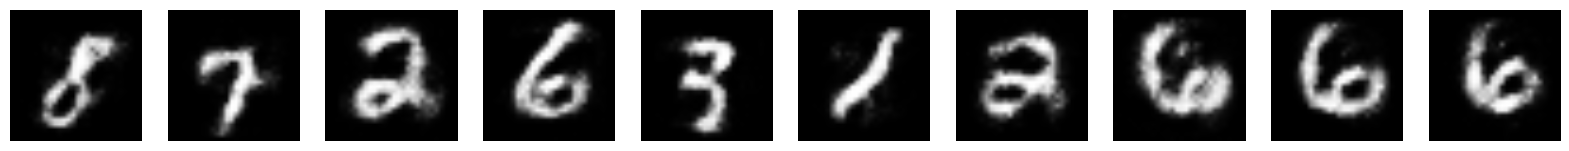

time: 1.7 s


In [164]:
show_images(data, 28, 28)
show_images(visible, 28, 28)

In [184]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
hidden = rbm.run_visible(X_train)
lr.fit(hidden, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

time: 15.5 s


In [185]:
lr.score(hidden, y_train)

0.89400000000000002

time: 76.1 ms
